# `satn_profile`
Computes the saturation profiles in an invasion image

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps

The arguments and their defaults for this function are:

In [2]:
import inspect
inspect.signature(ps.metrics.satn_profile)

<Signature (satn, s, axis=0, span=10, mode='tile')>

Start by performing a basic invasion simulation:

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

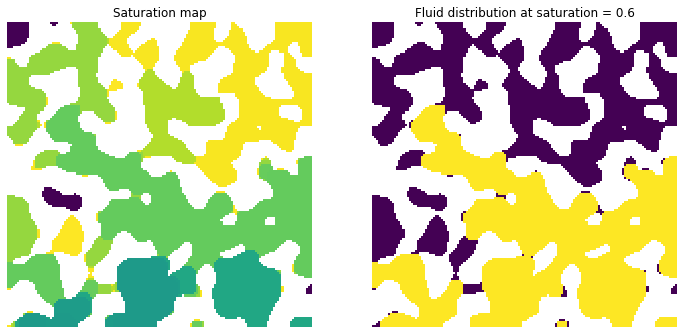

In [3]:
np.random.seed(1)
im = ps.generators.blobs(shape=[150, 150], porosity=0.6, blobiness=1)
inlets = np.zeros_like(im)
inlets[0, :] = True
inv = ps.simulations.drainage(im=im, inlets=inlets, voxel_size=1, g=0)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(inv.im_satn/im, interpolation='none', origin='lower')
ax[0].axis(False)
ax[0].set_title('Saturation map')
ax[1].imshow((inv.im_satn < 0.6)*(inv.im_satn > 0)/im, interpolation='none', origin='lower')
ax[1].axis(False)
ax[1].set_title('Fluid distribution at saturation = 0.6');

## `satn`
This is the output of the invasion function, converted to saturation if needed:

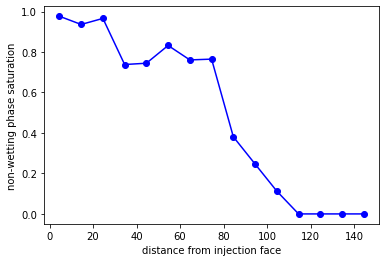

In [4]:
s = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6)
plt.plot(s.position, s.saturation, 'b-o')
plt.xlabel("distance from injection face")
plt.ylabel("non-wetting phase saturation");

## `s`
The global saturation for which the profile should be obtained:

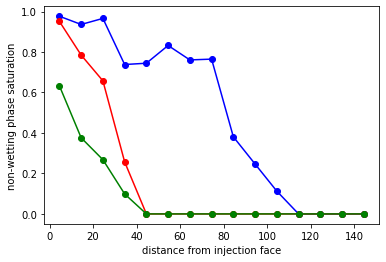

In [5]:
s = 0.6
s1 = ps.metrics.satn_profile(satn=inv.im_satn, s=s)
plt.plot(s1.position, s1.saturation, 'b-o')

s = 0.4
s2 = ps.metrics.satn_profile(satn=inv.im_satn, s=s)
plt.plot(s2.position, s2.saturation, 'r-o')

s = 0.1
s3 = ps.metrics.satn_profile(satn=inv.im_satn, s=s)
plt.plot(s3.position, s3.saturation, 'g-o')

plt.xlabel("distance from injection face")
plt.ylabel("non-wetting phase saturation");

## `span`
The width of the slice over which the saturation is computed.  The default is 10 voxels.  A higher number makes the curve smoother, but risks losing features like dips and spikes:

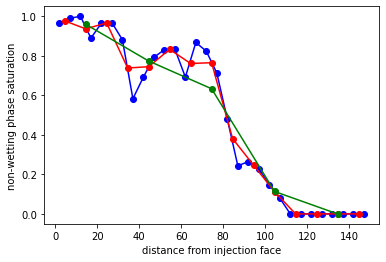

In [6]:
s = 5
s1 = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6, span=s)
plt.plot(s1.position, s1.saturation, 'b-o')

s = 10
s2 = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6, span=s)
plt.plot(s2.position, s2.saturation, 'r-o')

s = 30
s3 = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6, span=s)
plt.plot(s3.position, s3.saturation, 'g-o')

plt.xlabel("distance from injection face")
plt.ylabel("non-wetting phase saturation");

## `mode`
How the averaging window moves, either by sliding or by tiling. 

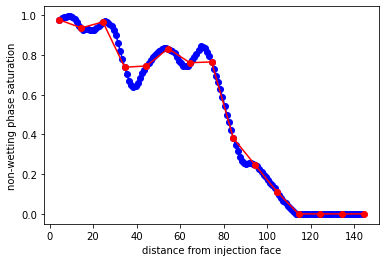

In [7]:
s1 = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6, mode='slide')
plt.plot(s1.position, s1.saturation, 'b-o')

s = 10
s2 = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6, mode='tile')
plt.plot(s2.position, s2.saturation, 'r-o')

plt.xlabel("distance from injection face")
plt.ylabel("non-wetting phase saturation");

## `axis`
The direction along with the averaging window moves. This can be perpendicular to the axis where the injection occurred to give additional insights into the saturation distribution:

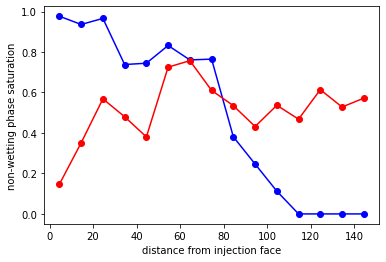

In [8]:
s1 = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6, axis=0)
plt.plot(s1.position, s1.saturation, 'b-o')

s = 10
s2 = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6, axis=1)
plt.plot(s2.position, s2.saturation, 'r-o')

plt.xlabel("distance from injection face")
plt.ylabel("non-wetting phase saturation");